# COMAP 2023 Wordle (Problem C) # 2316611

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [102]:
DATA_FILE = '../data/Problem_C_Data_Wordle.xlsx'
df = pd.read_excel(DATA_FILE,header=1)
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,2022-12-31,560,manly,20380,1899,0,2,17,37,29,12,2
1,2022-12-30,559,molar,21204,1973,0,4,21,38,26,9,1
2,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,12,2
3,2022-12-28,557,impel,20160,1937,0,3,21,40,25,9,1
4,2022-12-27,556,condo,20879,2012,0,2,17,35,29,14,3


In [103]:
df.rename(columns={'Date':'date','Contest number':'contest_num','Word':'word','Number of reported results':'num_results','Number in hard mode':'num_hardmode','1 try':'in1','2 tries':'in2','3 tries':'in3','4 tries':'in4','5 tries':'in5','6 tries':'in6','7 or more tries (X)':'over6'},inplace=True)

In [104]:
df[~(df['word'].apply(len) == 5)]

,date,contest_num,word,Number of reported results,num_hardmode,in1,in2,in3,in4,in5,in6,over6
15,2022-12-16,545,rprobe,22853,2160,0,6,24,32,24,11,3
35,2022-11-26,525,clen,26381,2424,1,17,36,31,12,3,0
246,2022-04-29,314,tash,106652,7001,2,19,34,27,13,4,1
353,2022-01-12,207,favor,137586,3073,1,4,15,26,29,21,4


In [105]:
df.loc[15,'word'] = 'probe'
df.loc[35,'word'] = 'clean'
df.loc[246,'word'] = 'trash'
df.loc[353,'word'] = 'favor'

In [136]:
df.loc[20,'word'] = 'naive'

In [137]:
df['letter1'] = df.word.apply(lambda x: x[0])
df['letter2'] = df.word.apply(lambda x: x[1])
df['letter3'] = df.word.apply(lambda x: x[2])
df['letter4'] = df.word.apply(lambda x: x[3])
df['letter5'] = df.word.apply(lambda x: x[4])

df['letter1_int'] = df.word.apply(lambda x: ord(x[0])-96)
df['letter2_int'] = df.word.apply(lambda x: ord(x[1])-96)
df['letter3_int'] = df.word.apply(lambda x: ord(x[2])-96)
df['letter4_int'] = df.word.apply(lambda x: ord(x[3])-96)
df['letter5_int'] = df.word.apply(lambda x: ord(x[4])-96)

In [107]:
df.head()

,date,contest_num,word,Number of reported results,num_hardmode,in1,in2,in3,in4,in5,...,letter1,letter2,letter3,letter4,letter5,letter1_int,letter2_int,letter3_int,letter4_int,letter5_int
0,2022-12-31,560,manly,20380,1899,0,2,17,37,29,...,m,a,n,l,y,13,1,14,12,25
1,2022-12-30,559,molar,21204,1973,0,4,21,38,26,...,m,o,l,a,r,13,15,12,1,18
2,2022-12-29,558,havoc,20001,1919,0,2,16,38,30,...,h,a,v,o,c,8,1,22,15,3
3,2022-12-28,557,impel,20160,1937,0,3,21,40,25,...,i,m,p,e,l,9,13,16,5,12
4,2022-12-27,556,condo,20879,2012,0,2,17,35,29,...,c,o,n,d,o,3,15,14,4,15


In [140]:
X = df[['contest_num','letter1_int','letter2_int','letter3_int','letter4_int','letter5_int']]
y = df[['in1','in2','in3','in4','in5','in6','over6']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train.in1)
preds1 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in2)
preds2 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in3)
preds3 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in4)
preds4 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in5)
preds5 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in6)
preds6 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.over6)
preds7 = model.predict(X_test)

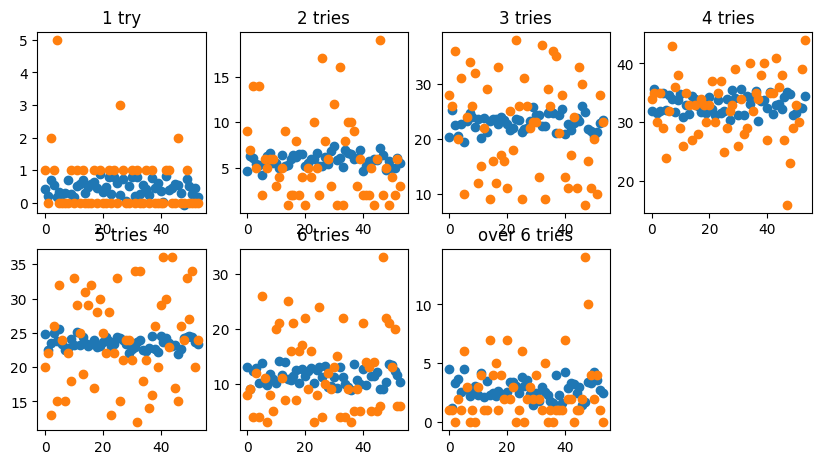

In [146]:
x = range(len(preds1))
fig = plt.figure(figsize=(10,8))

fig.add_subplot(341)
plt.title('1 try')
plt.scatter(x,preds1)
plt.scatter(x,y_test.in1)

fig.add_subplot(342)
plt.scatter(x,preds2)
plt.scatter(x,y_test.in2)
plt.title('2 tries')


fig.add_subplot(343)
plt.title('3 tries')
plt.scatter(x,preds3)
plt.scatter(x,y_test.in3)

fig.add_subplot(344)
plt.title('4 tries')
plt.scatter(x,preds4)
plt.scatter(x,y_test.in4)


fig.add_subplot(345)
plt.title('5 tries')
plt.scatter(x,preds5)
plt.scatter(x,y_test.in5)


fig.add_subplot(346)
plt.title('6 tries')
plt.scatter(x,preds6)
plt.scatter(x,y_test.in6)


fig.add_subplot(347)
plt.title('over 6 tries')
plt.scatter(x,preds7)
plt.scatter(x,y_test.over6)

plt.show()

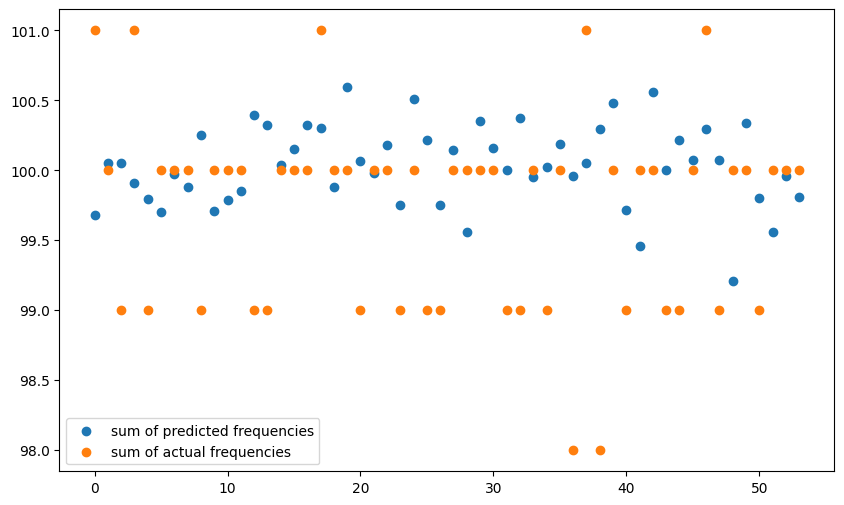

In [147]:
plt.figure(figsize=(10,6))
plt.scatter(x,preds1+preds2+preds3+preds4+preds5+preds6+preds7,label='sum of predicted frequencies')
plt.scatter(x,y_test.in1+y_test.in2+y_test.in3+y_test.in4+y_test.in5+y_test.in6+y_test.over6,label='sum of actual frequencies')
plt.legend()
plt.show()

In [148]:
print('1 try:')
print('\tmean_squared_error:', mean_squared_error(y_test.in1, preds1))
print('\tmean_absolute_error:', mean_absolute_error(y_test.in1, preds1))

print('2 tries:')
print('\tmean_squared_error:', mean_squared_error(y_test.in2, preds2))
print('\tmean_absolute_error:', mean_absolute_error(y_test.in2, preds2))

print('3 tries:')
print('\tmean_squared_error:', mean_squared_error(y_test.in3, preds3))
print('\tmean_absolute_error:', mean_absolute_error(y_test.in3, preds3))

print('4 tries:')
print('\tmean_squared_error:', mean_squared_error(y_test.in4, preds4))
print('\tmean_absolute_error:', mean_absolute_error(y_test.in4, preds4))

print('5 tries:')
print('\tmean_squared_error:', mean_squared_error(y_test.in5, preds5))
print('\tmean_absolute_error:', mean_absolute_error(y_test.in5, preds5))

print('6 tries:')
print('\tmean_squared_error:', mean_squared_error(y_test.in6, preds6))
print('\tmean_absolute_error:', mean_absolute_error(y_test.in6, preds6))

print('more than 6 tries:')
print('\tmean_squared_error:', mean_squared_error(y_test.over6, preds7))
print('\tmean_absolute_error:', mean_absolute_error(y_test.over6, preds7))

1 try:
	mean_squared_error: 0.7932301105529272
	mean_absolute_error: 0.5258957431486034
2 tries:
	mean_squared_error: 17.410988540721515
	mean_absolute_error: 3.2017446683429247
3 tries:
	mean_squared_error: 74.48204130268502
	mean_absolute_error: 7.25539639185556
4 tries:
	mean_squared_error: 29.795743291470995
	mean_absolute_error: 4.3381901523831266
5 tries:
	mean_squared_error: 42.377767861402305
	mean_absolute_error: 5.413043596495364
6 tries:
	mean_squared_error: 52.81653807173597
	mean_absolute_error: 5.9363550715229
more than 6 tries:
	mean_squared_error: 7.618687854516876
	mean_absolute_error: 2.021290941553692


In [149]:
df[['date','contest_num','word']]

,date,contest_num,word
0,2022-12-31,560,manly
1,2022-12-30,559,molar
2,2022-12-29,558,havoc
3,2022-12-28,557,impel
4,2022-12-27,556,condo
...,...,...,...
354,2022-01-11,206,drink
355,2022-01-10,205,query
356,2022-01-09,204,gorge
357,2022-01-08,203,crank


In [125]:
words = df[['word']].values.tolist()
words = [word[0] for word in words]
letter_freq = {}
for word in words:
    for char in word:
        if char in letter_freq:
            letter_freq[char] += 1
        else:
            letter_freq[char] = 1

print(letter_freq)


{'m': 55, 'a': 159, 'n': 88, 'l': 112, 'y': 61, 'o': 133, 'r': 134, 'h': 70, 'v': 25, 'c': 71, 'i': 102, 'p': 64, 'e': 184, 'd': 54, 'j': 4, 'u': 64, 'g': 51, 'x': 8, 't': 130, 's': 87, 'b': 31, 'k': 35, 'f': 33, 'w': 30, 'z': 5, 'q': 5}


In [139]:
df['word_score'] = df.apply(lambda x: letter_freq[x.letter1]+letter_freq[x.letter2]+letter_freq[x.letter3]+letter_freq[x.letter4]+letter_freq[x.letter5],axis=1)

In [153]:
X = df[['word_score']]
y = df[['in1','in2','in3','in4','in5','in6','over6']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=42)

model=LinearRegression()
model.fit(X_train,y_train.in1)
preds1 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in2)
preds2 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in3)
preds3 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in4)
preds4 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in5)
preds5 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.in6)
preds6 = model.predict(X_test)

model=LinearRegression()
model.fit(X_train,y_train.over6)
preds7 = model.predict(X_test)

In [154]:
print('1 try:')
print('\tmean_squared_error:', mean_squared_error(y_test.in1, preds1))
print('\tmean_absolute_error:', mean_absolute_error(y_test.in1, preds1))

print('2 tries:')
print('\tmean_squared_error:', mean_squared_error(y_test.in2, preds2))
print('\tmean_absolute_error:', mean_absolute_error(y_test.in2, preds2))

print('3 tries:')
print('\tmean_squared_error:', mean_squared_error(y_test.in3, preds3))
print('\tmean_absolute_error:', mean_absolute_error(y_test.in3, preds3))

print('4 tries:')
print('\tmean_squared_error:', mean_squared_error(y_test.in4, preds4))
print('\tmean_absolute_error:', mean_absolute_error(y_test.in4, preds4))

print('5 tries:')
print('\tmean_squared_error:', mean_squared_error(y_test.in5, preds5))
print('\tmean_absolute_error:', mean_absolute_error(y_test.in5, preds5))

print('6 tries:')
print('\tmean_squared_error:', mean_squared_error(y_test.in6, preds6))
print('\tmean_absolute_error:', mean_absolute_error(y_test.in6, preds6))

print('more than 6 tries:')
print('\tmean_squared_error:', mean_squared_error(y_test.over6, preds7))
print('\tmean_absolute_error:', mean_absolute_error(y_test.over6, preds7))

1 try:
	mean_squared_error: 0.7471500435061235
	mean_absolute_error: 0.6020090912276809
2 tries:
	mean_squared_error: 15.205955237339042
	mean_absolute_error: 2.9795761404213135
3 tries:
	mean_squared_error: 71.36668332168688
	mean_absolute_error: 7.287011857253144
4 tries:
	mean_squared_error: 29.50068894314723
	mean_absolute_error: 4.232411511203565
5 tries:
	mean_squared_error: 42.23791874732998
	mean_absolute_error: 5.443158977527215
6 tries:
	mean_squared_error: 49.043893929795686
	mean_absolute_error: 5.988019583420676
more than 6 tries:
	mean_squared_error: 7.245991009473618
	mean_absolute_error: 2.0629461170956507
